In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12,6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

### 01 도수 분포

#### 범주형 데이터 (카테고리 데이터 등등)의 도수 분포
- 파이썬을 사용하여 범주형 데이터에 대한 도수 분포를 구해본다.

In [2]:
# 물고기 종류 데이터를 읽어온다.
category_data = pd.read_csv('data/3-3-1-fish-species.csv')
category_data

,species
0,A
1,A
2,A
3,B
4,B
5,B
6,B
7,B
8,B
9,B


In [4]:
# value_counts 메서드를 통해 도수분포를 확인할 수 있다.
# 도수를 기준으로 내림 차순 정렬된다.
a1 = category_data['species'].value_counts()
a2 = pd.DataFrame(a1)
a3 = a2.reset_index()
a3.columns = ['물고기 종류', '물고기 수']
a3

,물고기 종류,물고기 수
0,B,7
1,A,3


- 도수 분포를 확인한 결과 A가 3 마리이고, B는 7 마리이다.

### 수치형 데이터에 대한 도수 분포

In [5]:
numeric_data = pd.read_csv('data/3-3-2-fish-length.csv')
numeric_data

,length
0,1.91
1,1.21
2,2.28
3,1.01
4,1.00
5,4.50
6,1.96
7,0.72
8,3.67
9,2.55


In [6]:
# 도수 분포를 구한다.
numeric_data['length'].value_counts()

length
1.91    1
1.21    1
2.28    1
1.01    1
1.00    1
4.50    1
1.96    1
0.72    1
3.67    1
2.55    1
Name: count, dtype: int64

In [8]:
# value_counts 메서드에는 bins라는 매개변수가 있다.
# 값의 구간을 정해 그 구간안에 해당하는 값이 얼마나 있는지를 계산해 볼 수 있다.
# 히스토그램의 근간이 되는 값이다.
# 3분할
# 하한은 포함지 않고 상한은 포함한다.

# 이 데이터는 우연히도 작은 범위가 수가 더 많고 그 이후로는 값이 똑같다.
# sort에 False를 넣어주면 정릴하지 않는다.
numeric_data['length'].value_counts(bins=3, sort=False)

(0.715, 1.98]    6
(1.98, 3.24]     2
(3.24, 4.5]      2
Name: count, dtype: int64

- 0.715초과 ~ 1.98 이하 : 6개
- 1.98초과 ~ 3.24 이하 : 2개
- 3.24초과 ~ 4.5 이하 : 2개

In [9]:
# 범위를 지정할 수 있다.
freq = numeric_data['length'].value_counts(bins=[0, 1, 2, 3, 4, 5], sort=False)
freq

(-0.001, 1.0]    2
(1.0, 2.0]       4
(2.0, 3.0]       2
(3.0, 4.0]       1
(4.0, 5.0]       1
Name: count, dtype: int64

- -0.001 초과 ~ 1.0 이하 : 2개
- 1.0 초과 ~ 2.0 이하 : 4개
- 2.0 초과 ~ 3.0 이하 : 2개
- 3.0 초과 ~ 4.0 이하 : 1개
- 4.0 초과 ~ 5.0 이하 : 1개

In [10]:
# 위에 작성한 예제는 pandas의 Sereis를 활용한 예이다.
# numpy 에서도 수치형 데이터에 대한 구간별 도수를 구할 수 있는 함수를 제공한다.
np.histogram(numeric_data['length'], bins=3)

(array([6, 2, 2]), array([0.72, 1.98, 3.24, 4.5 ]))

- 0.72 이상 ~ 1.98 미만 : 6개
- 1.98 이상 ~ 3.24 미만 : 2개
- 3.24 이상 ~ 4.5이하 : 2개

In [11]:
# 범위를 직접 지정
np.histogram(numeric_data['length'], bins=[0, 1, 2, 3, 4, 5])

(array([1, 5, 2, 1, 1]), array([0, 1, 2, 3, 4, 5]))

- 0 이상 ~ 1 미만 : 1개
- 1 이상 ~ 2 미만 : 5개
- 2 이상 ~ 3 미만 : 2개
- 3 이상 ~ 4 미만 : 1개
- 4 이상 ~ 5 이하 : 1개

### 02 상대 도수 분포와 누적 도수 분포

In [12]:
# 범위를 지정한 수치형 데이터의 도수를 구한다.
freq = numeric_data['length'].value_counts(bins=[0, 1, 2, 3, 4, 5], sort=False)
freq

(-0.001, 1.0]    2
(1.0, 2.0]       4
(2.0, 3.0]       2
(3.0, 4.0]       1
(4.0, 5.0]       1
Name: count, dtype: int64

In [13]:
# 도수를 표본의 개수로 나눠서 상대 도수를 구하낟.
rel_freq = freq / len(numeric_data['length'])
rel_freq

(-0.001, 1.0]    0.2
(1.0, 2.0]       0.4
(2.0, 3.0]       0.2
(3.0, 4.0]       0.1
(4.0, 5.0]       0.1
Name: count, dtype: float64

In [14]:
# value_counts 함수를 사용할 때 normalize에 True를 넣어주면 상대 도수를 구해준다.
numeric_data['length'].value_counts(bins=[0, 1, 2, 3, 4, 5], sort=False, normalize=True)

(-0.001, 1.0]    0.2
(1.0, 2.0]       0.4
(2.0, 3.0]       0.2
(3.0, 4.0]       0.1
(4.0, 5.0]       0.1
Name: proportion, dtype: float64

In [15]:
# numpy를 사용한다면 histogram 함수의 density를 True로 설정하면 상대 도수를 구할 수 있다.
np.histogram(numeric_data['length'], bins=[0, 1, 2, 3, 4, 5], density=True)

(array([0.1, 0.5, 0.2, 0.1, 0.1]), array([0, 1, 2, 3, 4, 5]))

- 주의할점
- pandas와 numpy 모두 도수 분포를 구할 수 있다는 것은 같다.
- pandas는 하한을 포함하지 않고 상한을 포함한다.
- numpy는 하한을 포함하고 상한을 포함하지 않으며 제일 마지막 것만 상한 하한 모두를 포함한다.
- 이 때문에 결과에 차이가 있을 수 있다.

### 누적 도수 분포

In [16]:
# 도수를 구하고 cumsum 함수를 호찰하면 누적 도수를 구할 수 있다.
freq = numeric_data['length'].value_counts(bins=[0, 1, 2, 3, 4, 5], sort=False)
a1 = freq.cumsum()

display(freq)
display(a1)

(-0.001, 1.0]    2
(1.0, 2.0]       4
(2.0, 3.0]       2
(3.0, 4.0]       1
(4.0, 5.0]       1
Name: count, dtype: int64

(-0.001, 1.0]     2
(1.0, 2.0]        6
(2.0, 3.0]        8
(3.0, 4.0]        9
(4.0, 5.0]       10
Name: count, dtype: int64

- 0.001 초과 ~ 1.0 이하 : 2개
- 0.001 초과 ~ 2.0 이하 : 6개
- 0.001 초과 ~ 3.0 이하 : 8개
- 0.001 초과 ~ 4.0 이하 : 9개
- 0.001 초과 ~ 5.0 이하 : 10개

In [17]:
# 상대 도수 분포를 구해 누적 도수를 구하면 
# 누적 상대 도수 분포를 구할 수 있다.
rel_freq = numeric_data['length'].value_counts(bins=[0, 1, 2, 3, 4, 5], sort=False, normalize=True)
a1 = rel_freq.cumsum()

display(rel_freq)
display(a1)

(-0.001, 1.0]    0.2
(1.0, 2.0]       0.4
(2.0, 3.0]       0.2
(3.0, 4.0]       0.1
(4.0, 5.0]       0.1
Name: proportion, dtype: float64

(-0.001, 1.0]    0.2
(1.0, 2.0]       0.6
(2.0, 3.0]       0.8
(3.0, 4.0]       0.9
(4.0, 5.0]       1.0
Name: proportion, dtype: float64

- 0.001 초과 ~ 1.0 이하 : 20%
- 0.001 초과 ~ 2.0 이하 : 60%
- 0.001 초과 ~ 3.0 이하 : 80%
- 0.001 초과 ~ 4.0 이하 : 90%
- 0.001 초과 ~ 5.0 이하 : 100%

### 03 히스토그램

In [18]:
# 기본 테마 설정
sns.set()

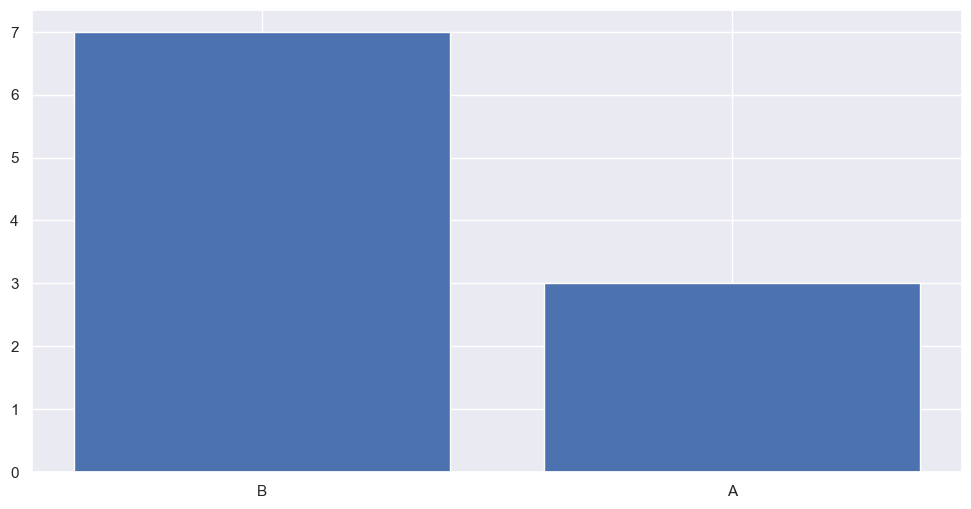

In [19]:
# 범주형 데이터 대한 도수 시각화
# matplotlib 사용
# 도수를 구한다.
a1 = category_data['species'].value_counts()
# 막대 그래프를 그린다.
plt.bar(a1.index, a1.values)
plt.show()

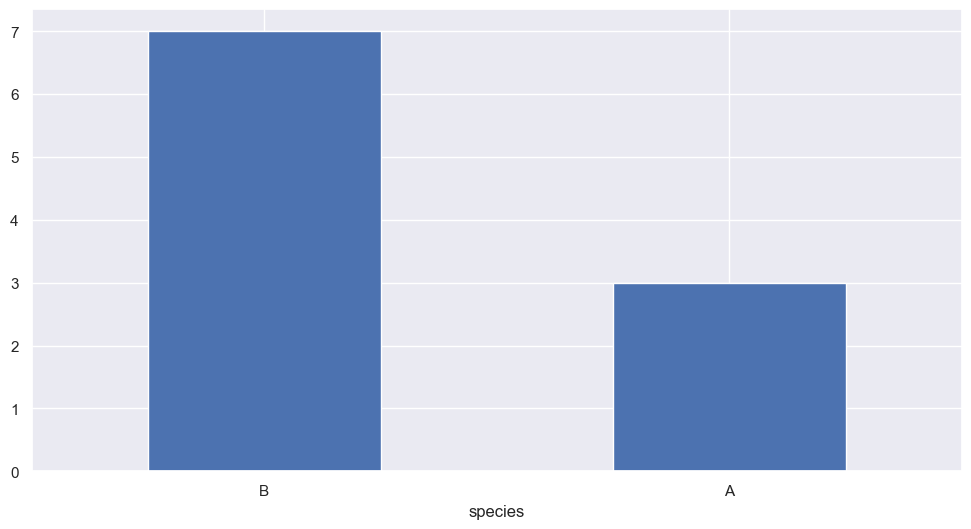

In [20]:
# pandas를 이용한 시각화
# 도수를 구한다.
a1 = category_data['species'].value_counts()
# 그린다.
# Series를 통해 막대 그래프를 그리면 index가 x 축, 값이 y 축이 된다.
a1.plot.bar()
plt.xticks(rotation=0)
plt.show()

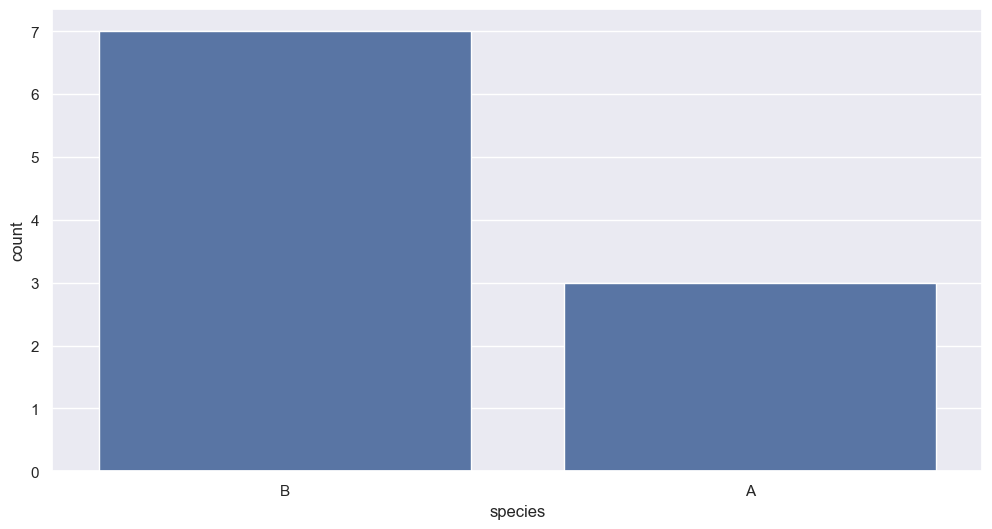

In [21]:
# seaborn을 이용한 시각화
# data에 DataFrame을 설정하고 x 에는 x 축에 적용할 컬럼명
# y 에는 y 축에 적용할 컬럼명을 작성해준다.

# countplot : 도수를 직접 구해서 그래프를 그려준다.
# 막대의 순서는 도수를 기준으로 정렬되 않는다.
a1 = category_data['species'].value_counts().index
sns.countplot(data=category_data, x='species', order=a1)
plt.show()

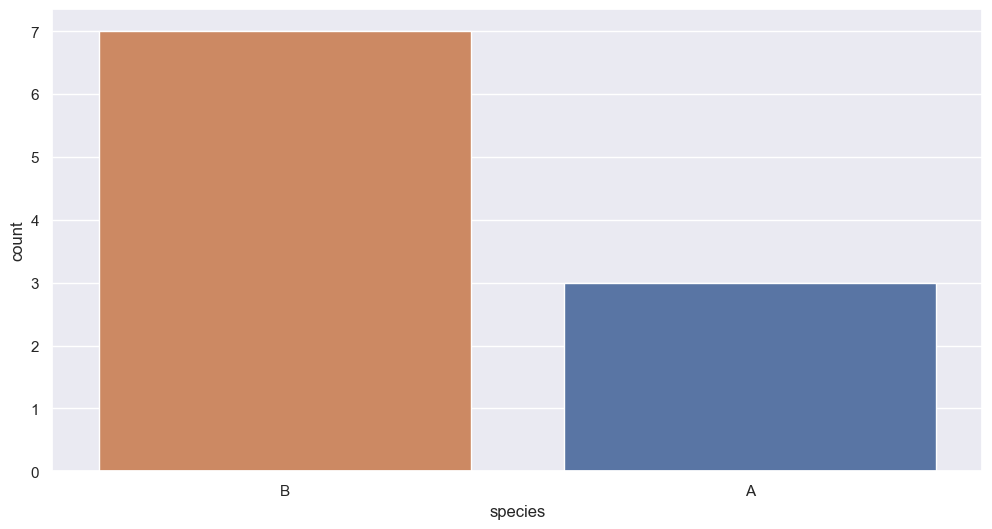

In [22]:
# seaborn을 이용한 시각화
# data에 DataFrame을 설정하고 x 에는 x 축에 적용할 컬럼명
# y 에는 y 축에 적용할 컬럼명을 작성해준다.

# countplot : 도수를 직접 구해서 그래프를 그려준다.
# 막대의 순서는 도수를 기준으로 정렬되 않는다.
a1 = category_data['species'].value_counts().index
sns.countplot(data=category_data, x='species', order=a1, hue='species')
plt.show()

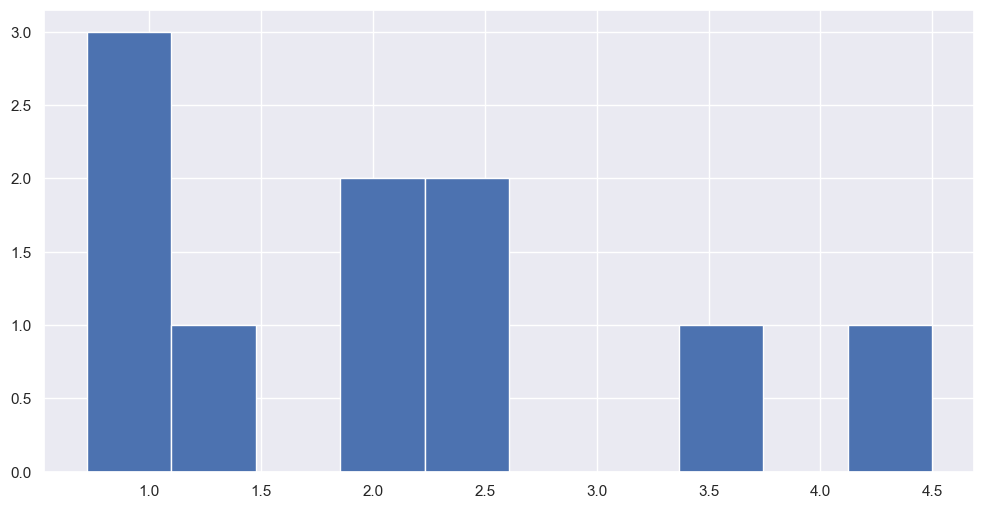

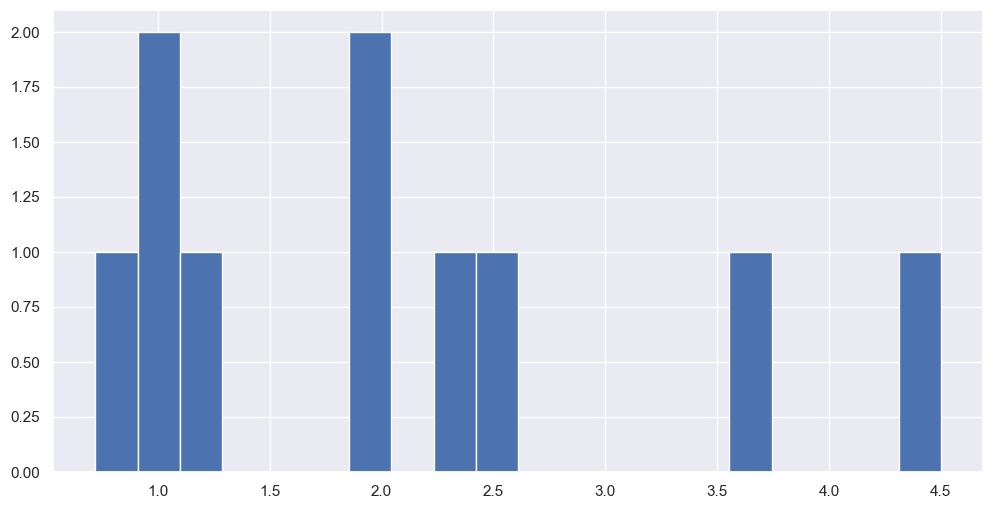

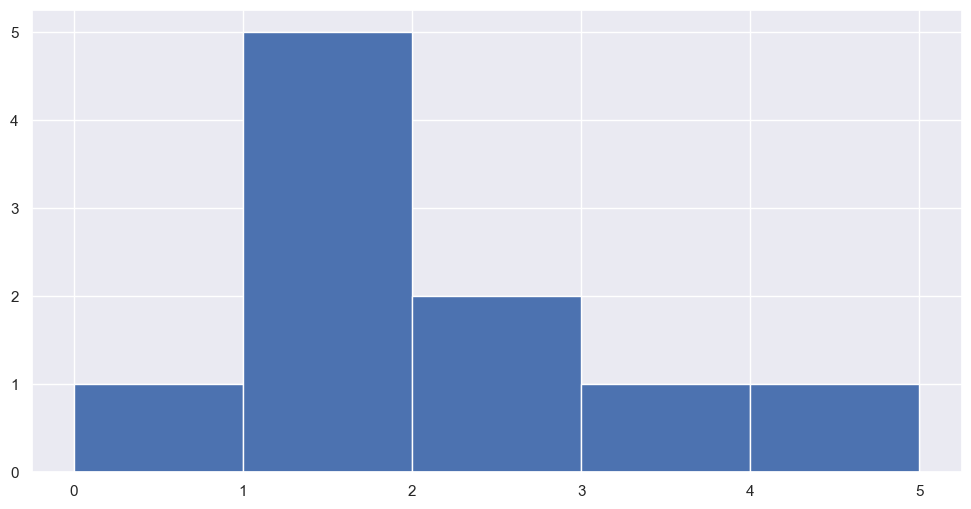

In [24]:
# 수치형 데이터를 통한 히스토그램
# matplotlib를 통한 히스토그램

# bins : 구간의 개수 혹은 구간의 범위를 설정해준다. 생략하면 10개의 구간의 개수로 설정된다.
plt.hist(data=numeric_data, x='length')
plt.show()

plt.hist(data=numeric_data, x='length', bins=20)
plt.show()

plt.hist(data=numeric_data, x='length', bins=[0, 1, 2, 3, 4, 5])
plt.show()

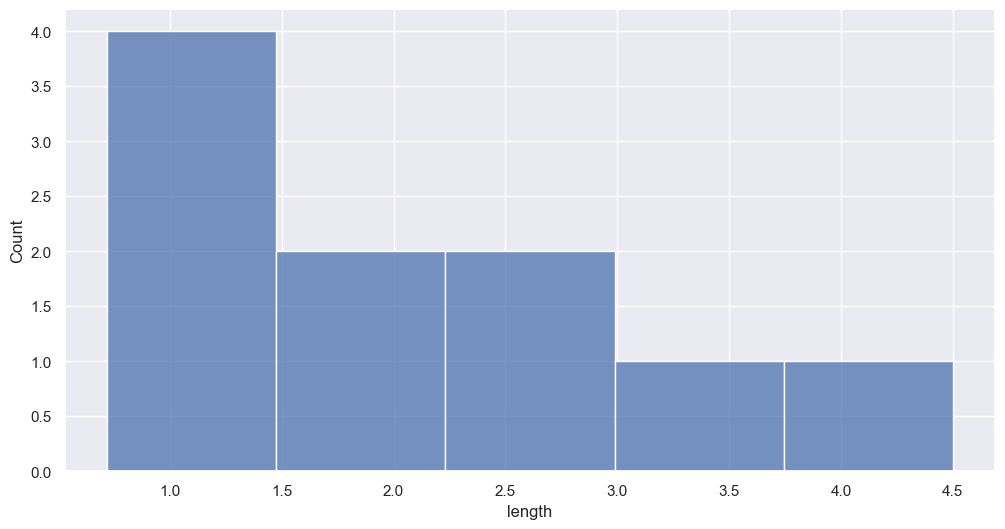

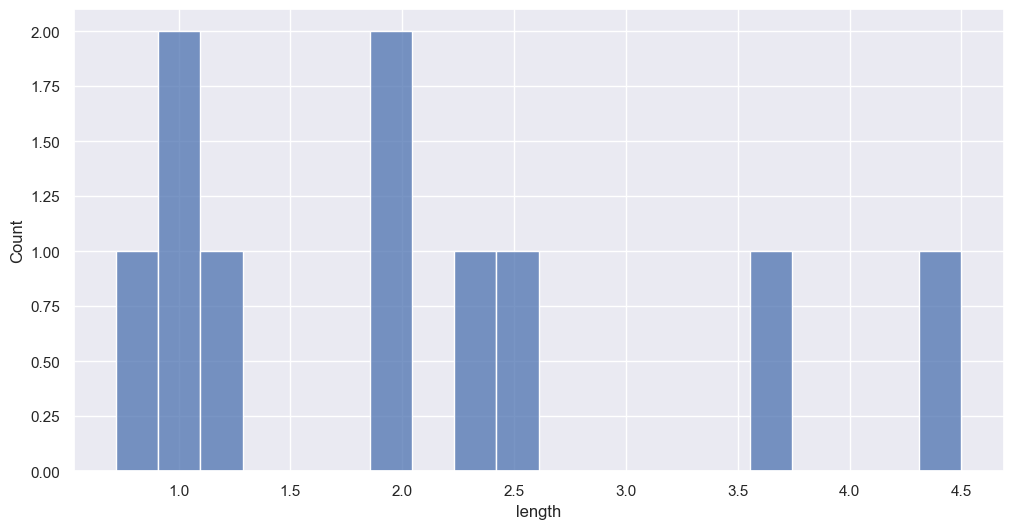

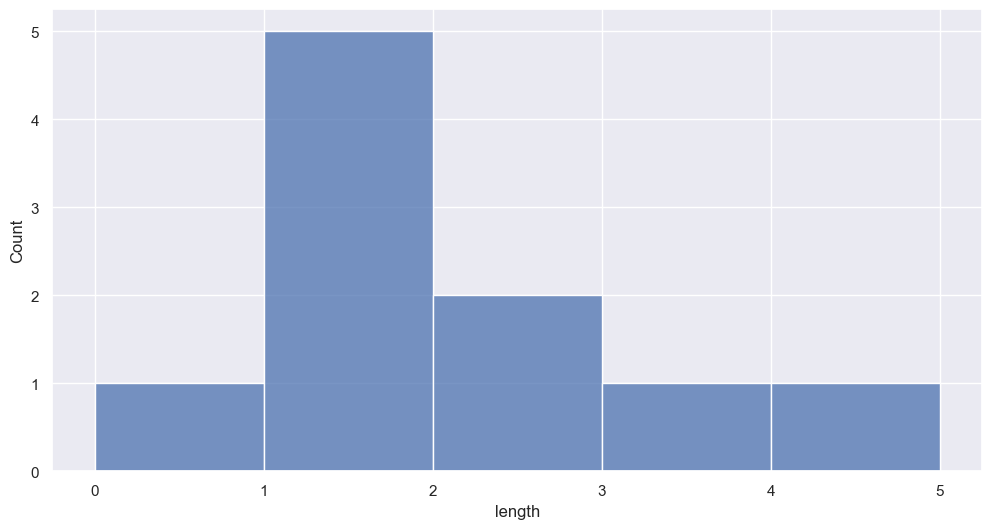

In [25]:
# seaborn 사용
# bins : matplotlib와 동일하다.
sns.histplot(data=numeric_data, x='length')
plt.show()

sns.histplot(data=numeric_data, x='length', bins=20)
plt.show()

sns.histplot(data=numeric_data, x='length', bins=[0, 1, 2, 3, 4, 5])
plt.show()

In [ ]:
# 계급 폭이 다른 히스토 그램
# 지금까지는 계급의 폭이 항상 같도록 bins 를 설정하였다.
# [0, 1, 2, 3, 4, 5] : 각 1씩

# 그러나 계급의 폭은 임의로 설정할 수 있으며 각 계급의 폭이 서로 다를 수도 있다.
numeric_data['length'].value_counts(bins=[0, 1, 2, 5], sort=False)
# -0.001 초과 ~ 1.0 이하(1) : 2개
# 1.0 초과 ~ 2.0 이하 (1) : 4개
# 2.0 초과 ~ 5.0 이하 (3) : 4개

(-0.001, 1.0]    2
(1.0, 2.0]       4
(2.0, 5.0]       4
Name: count, dtype: int64

In [27]:
numeric_data['length'].value_counts(bins=[0, 1, 2, 5], sort=False, normalize=True)
# -0.001 초과 ~ 1.0 이하 (1) : 20%
# 1.0 초과 ~ 2.0 이하 (1) : 40%
# 2.0 초과 ~ 5.0 이하 (3) : 40%

(-0.001, 1.0]    0.2
(1.0, 2.0]       0.4
(2.0, 5.0]       0.4
Name: proportion, dtype: float64

In [28]:
np.histogram(numeric_data['length'], bins=[0, 1, 2, 5])
# 0 이상 ~ 1 미만 (1) : 1개
# 1 이상 ~ 2 미만 (1) : 5개
# 2 이상 ~ 5 이하 (3) : 4개

(array([1, 5, 4]), array([0, 1, 2, 5]))

In [30]:
# numpy 를 통해 상대 도수를 구할 때 구간의 폭이 다르면 구간의 폭이 제일 작은 쪽에 맞춰서 계산된다.
# 상대 도수 값 X 구간의 크기를 해야 그 구간내에 있는 데이터가 전체에서 몇 %인지 확인이 가능하다.
np.histogram(numeric_data['length'], bins=[0, 1, 2, 5], density=True)
# 0 이상 ~ 1 미만 (1) : 10%
# 1 이상 ~ 2 미만 (1) : 50%
# 2 이상 ~ 5 이하 (3) : 13.333333% X 3

(array([0.1       , 0.5       , 0.13333333]), array([0, 1, 2, 5]))

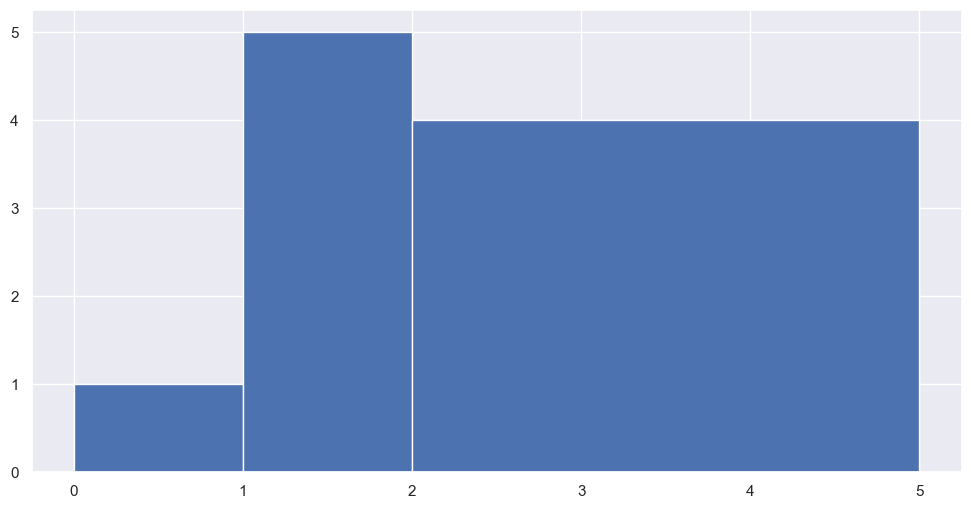

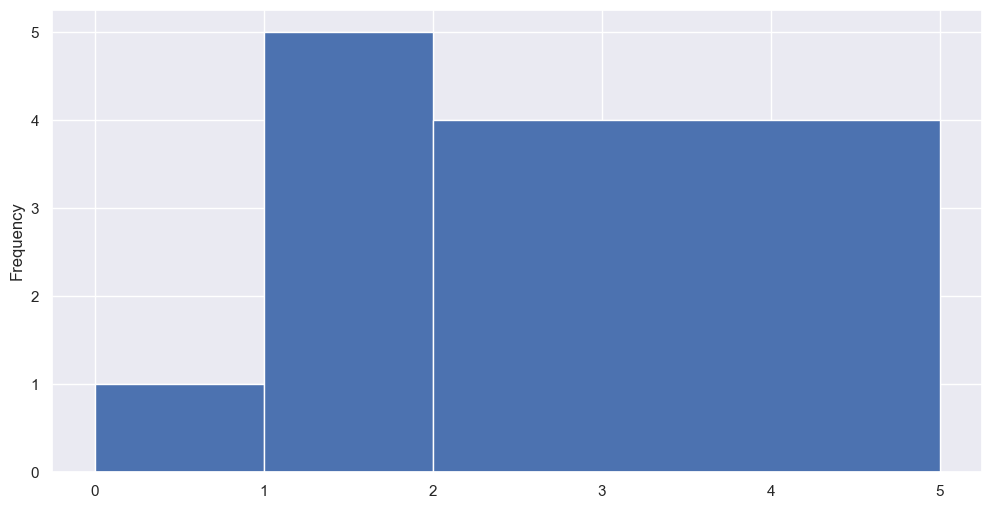

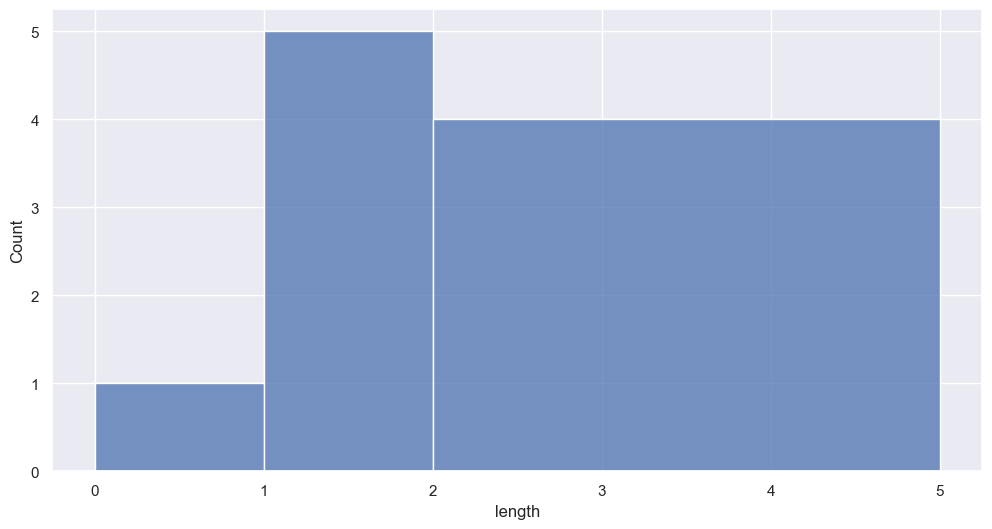

In [31]:
# 수치형 데이터에 대한 도수 분포를 시각화면 모두 동일하게 나온다.
plt.hist(numeric_data['length'], bins=[0, 1, 2, 5])
plt.show()

numeric_data['length'].plot(kind='hist', bins=[0, 1, 2, 5])
plt.show()

sns.histplot(data=numeric_data, x='length', bins=[0, 1, 2, 5])
plt.show()

- 각 구간의 크기 (계급의 크기)가 다를 경우 도수 분포를 구할 때는 pandas를 이용하는 것과 numpy를 이용하는 것이 같게 나온다 (경계에 대한 처리가 다르기 때문에 경계에 걸친 데이터가 있다면 약간의 차이가 있을 수는 있다.)
- 하지만 상대도수를 구할 때는 pandas의 경우 해당 구간에 있는 데이터의 비율이 나오고 numpy는 해당 구간에 있는 데이터의 비율을 최소 구간의 비율로 나눈 값으로 나온다.
- 데이터 시각화시 히스토그램을 그릴 때는 numpy가 가지고 있는 historam 함수를 통해 구한 값으로 그래프를 그리게 된다. 
- 해서 출력되는 그래프는 numpy에서 구한 해당 구간에 있는 데이터의 비율을 최소 구간의 비율로 나눈 값으로 그려지게 된다.

### 04 커널 밀도 추정 (KDE)

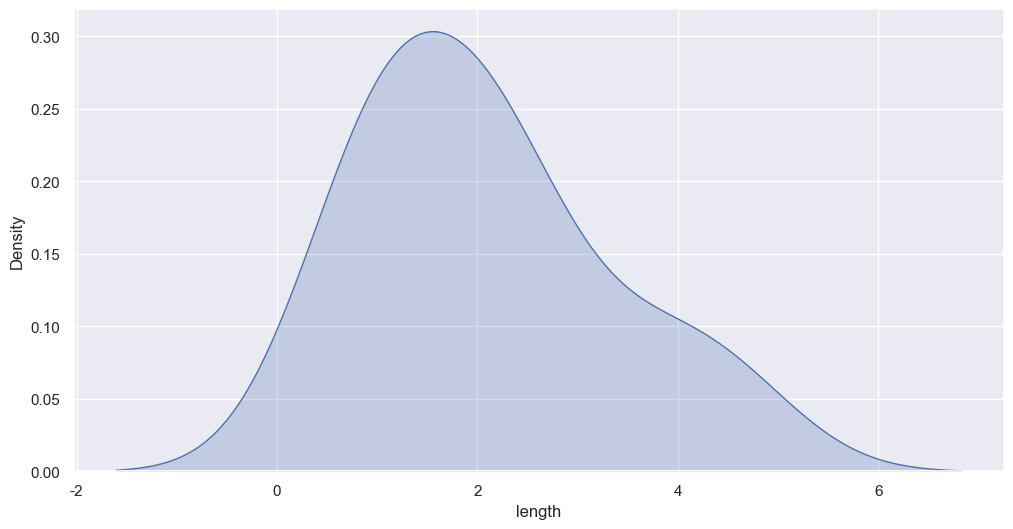

In [34]:
# kdeplot은 히스토그램의 단차 부분을 부드럽게 평활화 하기 위해 사용하는 그래프이다.
# 밀도를 추정하여 그리기 땜문에 도수 분포 보다는 상대 도수 분포와 유사하다.
# 히스토그램으로 그릴때 첫 막대나 마지막 막대가 0과 가깝지 않고 단차가 있다면 그 부분을
# 평활화 해서 표현해야 하기 때문에 값의 범위가 좀더 넓어질 수도 있다. (데이터는 음수가 없는데 음수까지 그래프로 표현될 수 있다.)

# 상대 도수 분포를 히스토그램으로 그릴때 다수의 히스토그램을 겹쳐서 그리면 겹치는 부분이 눈에 잘 띄지 않을 수도 있다.
# 이럴때 KDE를 사용하는 것을 권장한다.
sns.kdeplot(data=numeric_data, x='length', fill=True)
plt.show()

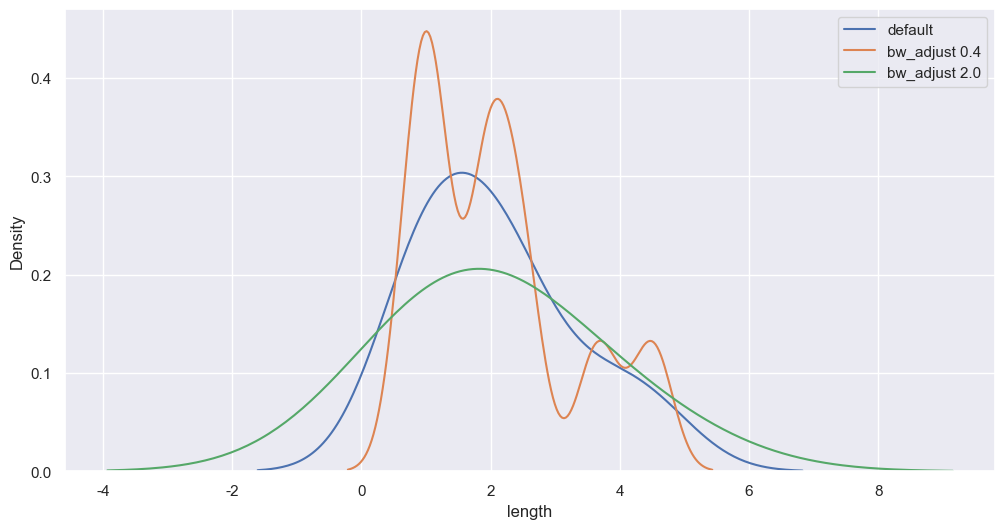

In [35]:
# kde는 정확한 상대 도수 수치 보다는 패턴을 보는 것이기 때문에
# 범위를 조정할 수 있는 매개변수를 제공한다.
# bw_adjust를 줄이면 kde 그래프의 폭이 좁아지고 변동이 커지게 된다.
# 반대로 bw_adjust를 키우면 그래프의 폭이 넓어지고 보다 부드럽게 표현한다.

# 적당히 조절해서 데이터의 분포만 확인하는 용도로 사용한다.
sns.kdeplot(data=numeric_data, x='length', label='default')
sns.kdeplot(data=numeric_data, x='length', bw_adjust=0.4, label='bw_adjust 0.4')
sns.kdeplot(data=numeric_data, x='length', bw_adjust=2.0, label='bw_adjust 2.0')
plt.legend()
plt.show()